#Basic Model

Text(0, 0.5, 'MPG')

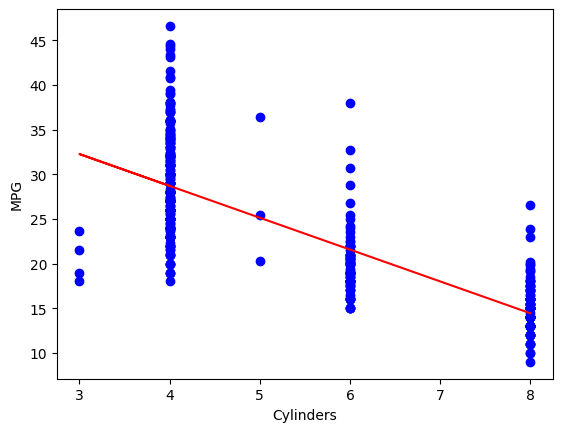

In [ ]:
import requests
import pandas as pd
from io import StringIO
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
## The URL for the dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data' 
r = requests.get(url)
## Read the file in and store as df
file = r.text.replace("\t"," ")  # list_labels written manually: 
list_labels = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin','car name']
df = pd.read_csv(StringIO(file),sep="\s+",header = None,names=list_labels)
## Modeling
regr = linear_model.LinearRegression()
train_x = np.asanyarray(df[['cylinders']])
train_y = np.asanyarray(df[['mpg']])
regr.fit (train_x, train_y)
## Plotting the model
plt.scatter(df.cylinders, df.mpg,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("Cylinders")
plt.ylabel("MPG")

In [ ]:
df

mpg  cylinders  displacement horsepower  weight  acceleration  \
0    18.0          8         307.0      130.0  3504.0          12.0   
1    15.0          8         350.0      165.0  3693.0          11.5   
2    18.0          8         318.0      150.0  3436.0          11.0   
3    16.0          8         304.0      150.0  3433.0          12.0   
4    17.0          8         302.0      140.0  3449.0          10.5   
..    ...        ...           ...        ...     ...           ...   
393  27.0          4         140.0      86.00  2790.0          15.6   
394  44.0          4          97.0      52.00  2130.0          24.6   
395  32.0          4         135.0      84.00  2295.0          11.6   
396  28.0          4         120.0      79.00  2625.0          18.6   
397  31.0          4         119.0      82.00  2720.0          19.4   

     model year  origin                   car name  
0            70       1  chevrolet chevelle malibu  
1            70       1          buick skylark 320  
2            70       1         plymouth satellite  
3            70       1              amc rebel sst  
4            70       1                ford torino  
..          ...     ...                        ...  
393          82       1            ford mustang gl  
394          82       2                  vw pickup  
395          82       1              dodge rampage  
396          82       1                ford ranger  
397          82       1                 chevy s-10  

[398 rows x 9 columns]

In [ ]:
import requests
import pandas as pd
from io import StringIO
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
import lime.lime_tabular
import matplotlib.pylab as pl
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
## Read in the file
df = pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/00350/default%20of%20credit%20card%20clients.xls',header = 1)
## Store target in y variable and split to train test
y = df['default payment next month'] 
df = df.drop(['default payment next month','ID'], axis =1) 
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.20, random_state=42)
## Train XGBoost Model
xgb_model = XGBClassifier(learning_rate = 0.05, verbosity = 1, n_estimators = 200 ,scale_pos_weight =4, random_state = 2456 )
xgb_model.fit(X_train, y_train)
## Predict
y_pred = xgb_model.predict(X_test) 
roc_auc_score(y_test,y_pred)

0.7123292034115526

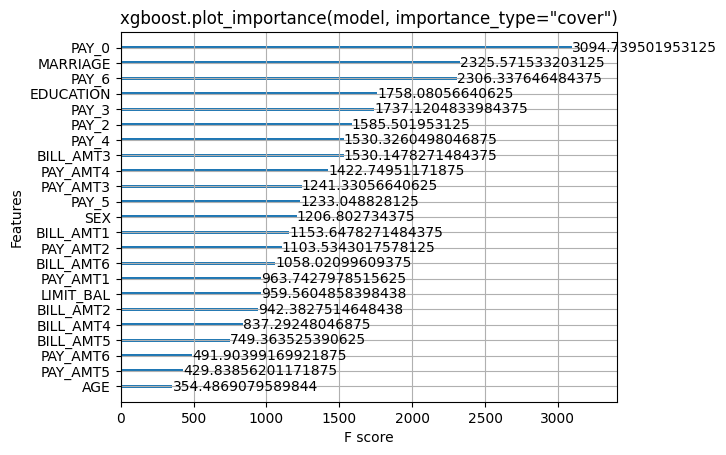

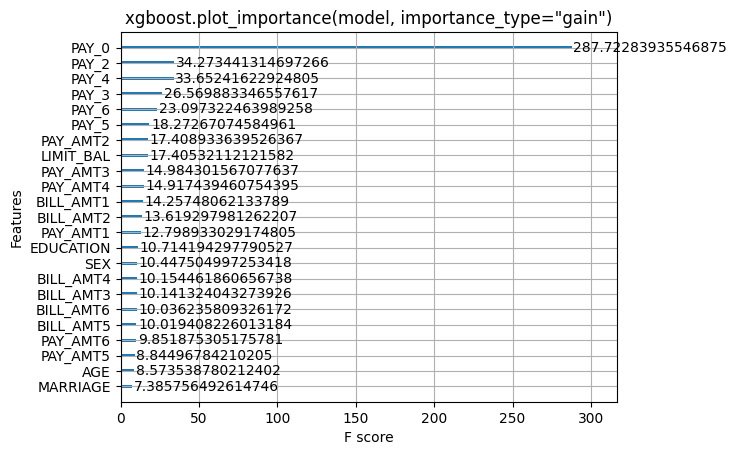

In [ ]:
## Plot importance (cover)
xgb.plot_importance(xgb_model, importance_type="cover")
pl.title('xgboost.plot_importance(model, importance_type="cover")')
pl.show()
## Plot importance (gain)
xgb.plot_importance(xgb_model, importance_type="gain")
pl.title('xgboost.plot_importance(model, importance_type="gain")')
pl.show()

In [ ]:
X_train

LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
21753      80000    2          2         2   24      0      0      0      0   
251        30000    1          2         2   28      0      0      0      0   
22941     180000    2          5         1   44      0      0     -1     -1   
618        60000    1          1         2   25      0      0      0      0   
17090     130000    2          2         2   25      0      0      0      0   
...          ...  ...        ...       ...  ...    ...    ...    ...    ...   
29802      50000    1          2         2   32      0      0      0      0   
5390      200000    1          1         2   37      2      2      2      2   
860        50000    1          1         2   26     -2     -2     -2     -2   
15795      70000    2          2         2   25      0      0      0      0   
23654     160000    2          2         1   36     -2     -2     -2     -2   

       PAY_5  ...  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  \
21753      0  ...      78321      73731      39643      39457      3503   
251        0  ...      29155      25255      22001          0      5006   
22941     -1  ...        850          0       6881      10340         0   
618        0  ...      38533      39639      39619      39140      2018   
17090      0  ...     114734     117823     120854     123904      4100   
...      ...  ...        ...        ...        ...        ...       ...   
29802      0  ...      55739      55957      29238       6119      2000   
5390       2  ...     168386     164182     169029     172084     13500   
860       -2  ...          0          0          0          0         0   
15795      2  ...      51152      35122      28633      28039      3000   
23654     -2  ...       3640       2935       1603      14129         0   

       PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  
21753      5001      2092      1218      1445       878  
251        1244       851       955         0         0  
22941       850         0      6881     10340       182  
618        1900      2000      1500      1900      2000  
17090      4200      5000      5000      5000     10700  
...         ...       ...       ...       ...       ...  
29802      3000      1591        72      1134     73421  
5390       6000         0      7500      6000      4000  
860           0         0         0         0         0  
15795      2000      4500      1200         0      1200  
23654      3660      3135      1650     14200      1500  

[24000 rows x 23 columns]

In [ ]:
xgb_model.fit(X_train.to_numpy(), y_train)
predict_fn_xgb = lambda x: xgb_model.predict_proba(x).astype(float)

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Explainable Models

In [3]:
import pandas as pd 
# Makes sure we see all columns
pd.set_option('display.max_columns', None)
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

class DataLoader():
    def __init__(self):
        self.data = None

    def load_dataset(self, path="/content/drive/MyDrive/Colab Notebooks/healthcare-dataset-stroke-data.csv"):
        self.data = pd.read_csv(path)

    def preprocess_data(self):
        # One-hot encode all categorical columns
        categorical_cols = ["gender",
                            "ever_married",
                            "work_type",
                            "Residence_type",
                            "smoking_status"]
        encoded = pd.get_dummies(self.data[categorical_cols], 
                                prefix=categorical_cols)

        # Update data with new columns
        self.data = pd.concat([encoded, self.data], axis=1)
        self.data.drop(categorical_cols, axis=1, inplace=True)

        # Impute missing values of BMI
        self.data.bmi = self.data.bmi.fillna(0)
        
        # Drop id as it is not relevant
        self.data.drop(["id"], axis=1, inplace=True)

        # Standardization 
        # Usually we would standardize here and convert it back later
        # But for simplification we will not standardize / normalize the features

    def get_data_split(self):
        X = self.data.iloc[:,:-1]
        y = self.data.iloc[:,-1]
        return train_test_split(X, y, test_size=0.20, random_state=2021)
    
    def oversample(self, X_train, y_train):
        oversample = RandomOverSampler(sampling_strategy='minority')
        # Convert to numpy and oversample
        x_np = X_train.to_numpy()
        y_np = y_train.to_numpy()
        x_np, y_np = oversample.fit_resample(x_np, y_np)
        # Convert back to pandas
        x_over = pd.DataFrame(x_np, columns=X_train.columns)
        y_over = pd.Series(y_np, name=y_train.name)
        return x_over, y_over

In [ ]:
!pip install interpret-core
!pip install dash-cytoscape

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 39.2 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 33.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 29.6 MB/s eta 0:00:00


In [ ]:
# # %% Imports
# from utils import DataLoader
from interpret.glassbox import (LogisticRegression,
                                ClassificationTree, 
                                ExplainableBoostingClassifier)
from interpret import show
from sklearn.metrics import f1_score, accuracy_score

# %% Load and preprocess data
data_loader = DataLoader()
data_loader.load_dataset()
data_loader.preprocess_data()

# Split the data for evaluation
X_train, X_test, y_train, y_test = data_loader.get_data_split()
print(X_train.shape)
print(X_test.shape)
# Oversample the train data
X_train, y_train = data_loader.oversample(X_train, y_train)
print("After oversampling:", X_train.shape)

# %% Fit logistic regression model
lr = LogisticRegression(random_state=2021, feature_names=X_train.columns, penalty='l1', solver='liblinear')
lr.fit(X_train, y_train)
print("\nLogistic Regression:")

# %% Evaluate logistic regression model
y_pred = lr.predict(X_test)
print(f"F1 Score {f1_score(y_test, y_pred, average='macro')}")
print(f"Accuracy {accuracy_score(y_test, y_pred)}")


# %% Fit decision tree model
tree = ClassificationTree()
tree.fit(X_train, y_train)
print("\nClassification Tree:")
y_pred = tree.predict(X_test)
print(f"F1 Score {f1_score(y_test, y_pred, average='macro')}")
print(f"Accuracy {accuracy_score(y_test, y_pred)}")

(4088, 21)
(1022, 21)
After oversampling: (7778, 21)

Logistic Regression:
F1 Score 0.5174870955116426
Accuracy 0.7367906066536204

Classification Tree:
F1 Score 0.5259920468974536
Accuracy 0.761252446183953


##Logistic Regression

In [ ]:
# %% Explain local prediction
lr_local = lr.explain_local(X_test[:100], y_test[:100], name='Logistic Regression')
show(lr_local)

In [ ]:
# %% Explain global logistic regression model
lr_global = lr.explain_global(name='Logistic Regression')
show(lr_global)

##Decision Tree

In [ ]:
# %% Explain local prediction
tree_local = tree.explain_local(X_test[:100], y_test[:100], name='Tree')
show(tree_local)

##ExplainableBoostingClassifier

In [ ]:
from interpret.glassbox import (ExplainableBoostingClassifier)
from interpret import show
# %% Fit Explainable Boosting Machine
ebm = ExplainableBoostingClassifier(random_state=2021)
ebm.fit(X_train, y_train) 
print("Explainable Boosting Classifier")
y_pred = ebm.predict(X_test)
print(f"F1 Score {f1_score(y_test, y_pred, average='macro')}")
print(f"Accuracy {accuracy_score(y_test, y_pred)}")

Explainable Boosting Classifier
F1 Score 0.5747641395326335
Accuracy 0.8737769080234834


In [ ]:
# %% Explain locally
ebm_local = ebm.explain_local(X_test[:100], y_test[:100], name='EBM')
show(ebm_local)


In [ ]:
# %% Explain globally
ebm_global = ebm.explain_global(name='EBM')
show(ebm_global)

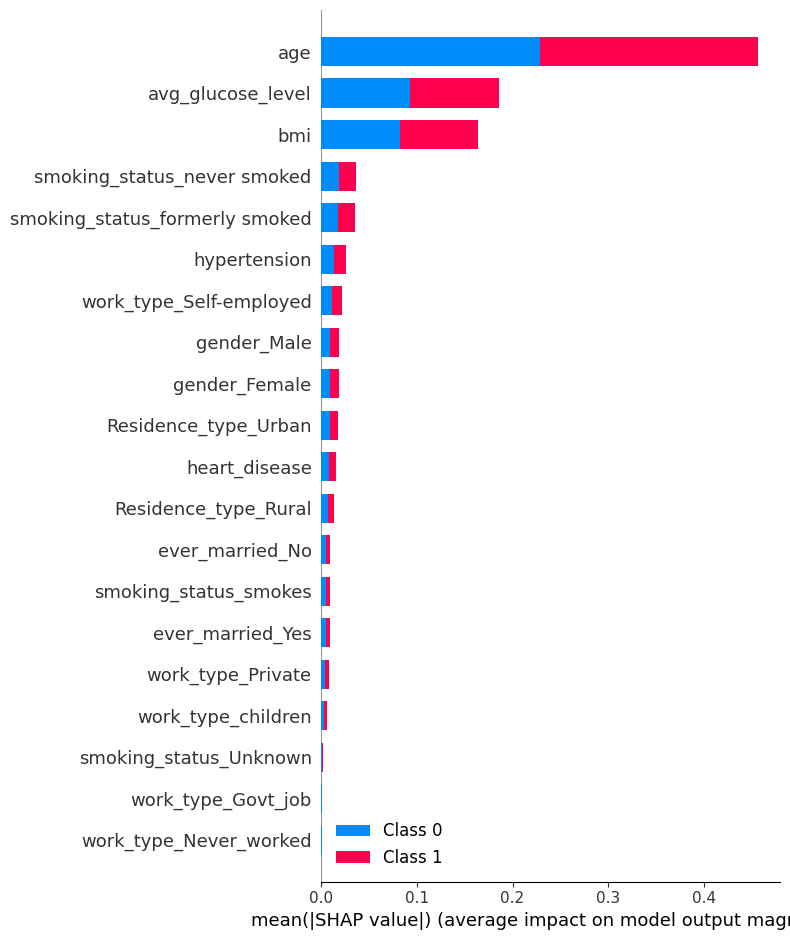

In [ ]:
# %% >> Visualize global features
# Feature summary
shap.summary_plot(shap_values, X_test)


#Lime

In [ ]:
!pip install lime
import lime

In [ ]:
# %% Imports
# from utils import DataLoader
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score
from interpret.blackbox import LimeTabular
from interpret import show

# %% Load and preprocess data
data_loader = DataLoader()
data_loader.load_dataset()
data_loader.preprocess_data()
# Split the data for evaluation
X_train, X_test, y_train, y_test = data_loader.get_data_split()
# Oversample the train data
X_train, y_train = data_loader.oversample(X_train, y_train)
print(X_train.shape)
print(X_test.shape)

# %% Fit blackbox model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(f"F1 Score {f1_score(y_test, y_pred, average='macro')}")
print(f"Accuracy {accuracy_score(y_test, y_pred)}")

# %%

(7778, 21)
(1022, 21)
F1 Score 0.5312473277101878
Accuracy 0.9422700587084148


##Using InterpretML

In [ ]:
# %% Apply lime
# Initilize Lime for Tabular data
lime = LimeTabular(rf, X_train, 
                   random_state=1)
# Get local explanations
lime_local = lime.explain_local(X_test[-20:], 
                                y_test[-20:], 
                                name='LIME')

show(lime_local)

##Using Lime Package

In [ ]:
from lime.lime_tabular import LimeTabularExplainer

# Create a function that returns predicted probabilities using a RandomForestClassifier
predict_fn = lambda x: rf.predict_proba(x)

# Create LimeTabular object
lime = LimeTabularExplainer(X_train.values, feature_names=X_train.columns, class_names=['No Fraud', 'Fraud'], kernel_width=3, verbose=False, mode='classification', discretize_continuous=True, random_state=1, sample_around_instance=True)

# Use Lime to explain a single prediction
exp = lime.explain_instance(X_test.iloc[0], predict_fn, num_features=5)
exp.show_in_notebook()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but RandomForestClassifier was fitted with feature names



In [ ]:
observation_1 = 1000  # replace 0 with the index of the row you want to explain
explainer = lime.lime_tabular.LimeTabularExplainer(X_train.to_numpy(), feature_names=X_train.columns)
exp = explainer.explain_instance(X_test.to_numpy()[observation_1], predict_fn_xgb, num_features=9)
exp.show_in_notebook()

#SHAP

##SHAP Package

In [ ]:
!pip install shap
import shap
shap.initjs()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 10.3 MB/s eta 0:00:00


In [ ]:
import shap

# explain the xgb_model's predictions using SHAP values
explainer = shap.Explainer(xgb_model)
shap_values = explainer(X_train)

# visualize the first prediction's explanation
shap.plots.waterfall(shap_values[0])

NameError: ignored

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


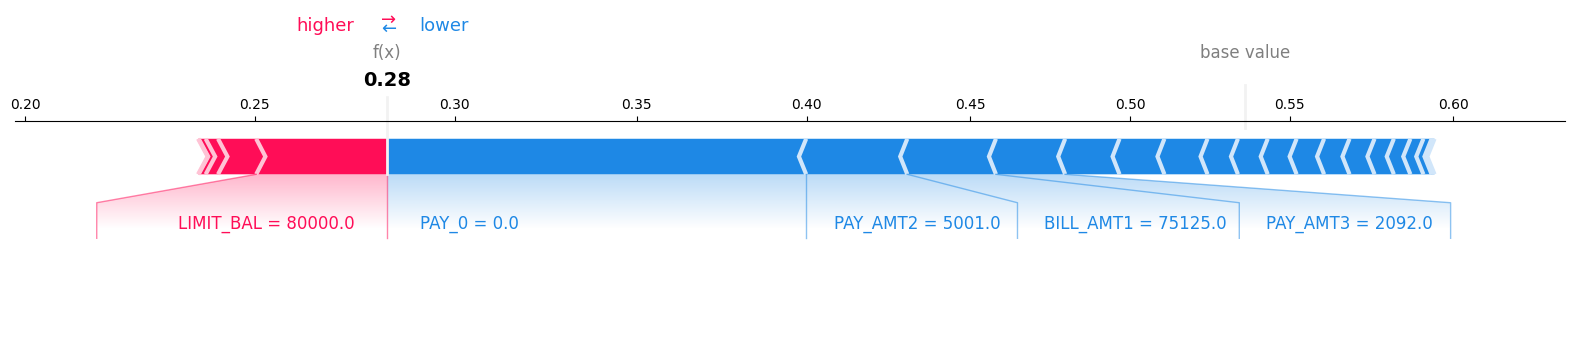

In [ ]:
# explain the xgb_model's predictions using SHAP values
explainer = shap.TreeExplainer(xgb_model)
shap_values = explainer.shap_values(X_train)

# initialize the javascript library
shap.initjs()

# generate a force plot for the first observation
observation_1 = 0
expected_value = explainer.expected_value
features_display = X_train
shap.force_plot(expected_value, shap_values[observation_1,:], features_display.iloc[observation_1,:], feature_names=X_train.columns, link='logit', matplotlib=True)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


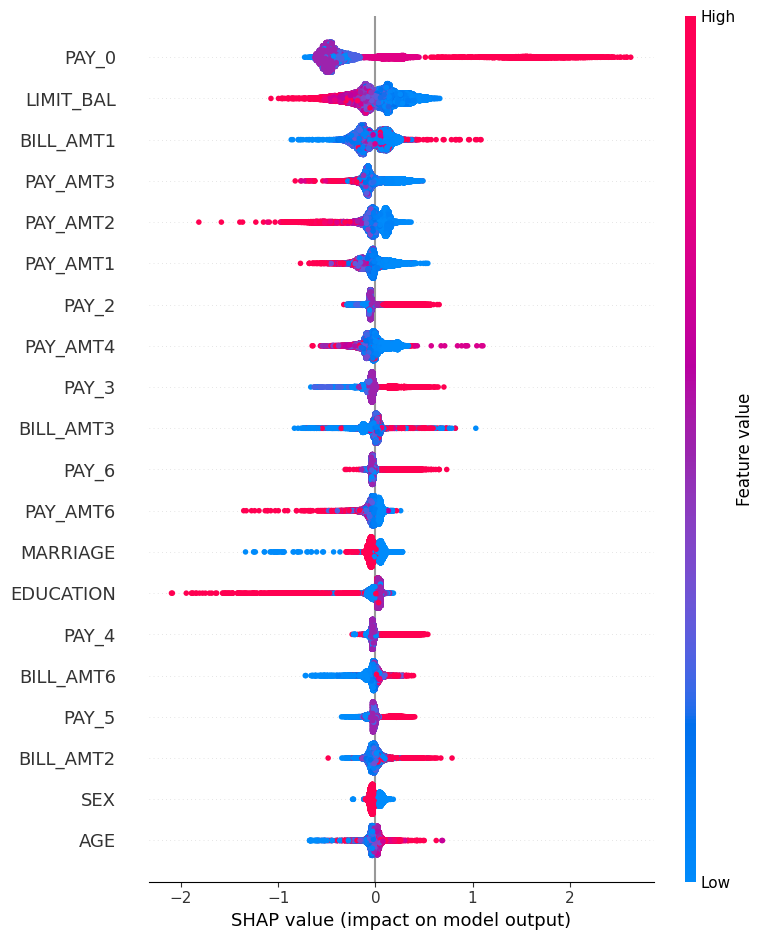

In [ ]:
shap.summary_plot(shap_values, X_train)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


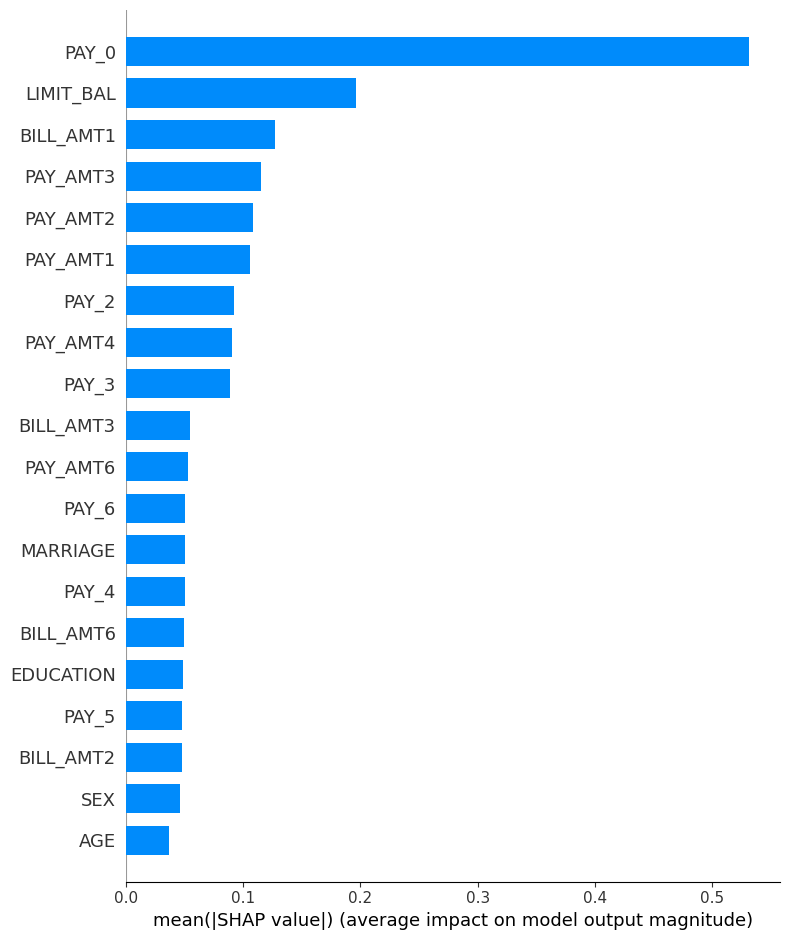

In [ ]:
e = shap.TreeExplainer(xgb_model)
shap_values3 = e.shap_values(X_test)
shap.summary_plot(shap_values3, X_test, plot_type="bar")

In [ ]:
# %% Imports
# from utils import DataLoader
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score
import shap

# %% Load and preprocess data
data_loader = DataLoader()
data_loader.load_dataset()
data_loader.preprocess_data()
# Split the data for evaluation
X_train, X_test, y_train, y_test = data_loader.get_data_split()
# Oversample the train data
X_train, y_train = data_loader.oversample(X_train, y_train)
print(X_train.shape)
print(X_test.shape)

# %% Fit blackbox model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(f"F1 Score {f1_score(y_test, y_pred, average='macro')}")
print(f"Accuracy {accuracy_score(y_test, y_pred)}")

(7778, 21)
(1022, 21)
F1 Score 0.5322285353535354
Accuracy 0.9432485322896281


In [ ]:
# %% Create SHAP explainer
explainer = shap.TreeExplainer(rf)
# Calculate shapley values for test data
start_index = 1
end_index = 2
shap_values = explainer.shap_values(X_test[start_index:end_index])
X_test[start_index:end_index]

# %% Investigating the values (classification problem)
# class 0 = contribution to class 1
# class 1 = contribution to class 2
print(shap_values[0].shape)
shap_values


(1, 21)


[array([[ 9.31195445e-03,  9.31977124e-03, -8.30598449e-07,
         -4.65272157e-03, -4.40749184e-03, -2.53570435e-04,
         -4.69507541e-05,  3.89873366e-03,  1.09786085e-02,
         -2.73970361e-03,  6.55354356e-03,  8.85170709e-03,
         -9.08569096e-04,  1.73549486e-02,  1.80332031e-02,
          4.56013238e-03,  2.28532299e-01,  1.28853781e-02,
          7.83368424e-03,  9.27109334e-02,  8.19072343e-02]]),
 array([[-9.31195445e-03, -9.31977124e-03,  8.30598449e-07,
          4.65272157e-03,  4.40749184e-03,  2.53570435e-04,
          4.69507541e-05, -3.89873366e-03, -1.09786085e-02,
          2.73970361e-03, -6.55354356e-03, -8.85170709e-03,
          9.08569096e-04, -1.73549486e-02, -1.80332031e-02,
         -4.56013238e-03, -2.28532299e-01, -1.28853781e-02,
         -7.83368424e-03, -9.27109334e-02, -8.19072343e-02]])]

In [ ]:
# %% >> Visualize local predictions
shap.initjs()
# Force plot
prediction = rf.predict(X_test[start_index:end_index])[0]
print(f"The RF predicted: {prediction}")
shap.force_plot(explainer.expected_value[1],
                shap_values[1],
                X_test[start_index:end_index]) # for values

The RF predicted: 0


# Counter-Factuals

In [5]:
# %% Create diverse counterfactual explanations
!pip install dice-ml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 20.2 MB/s eta 0:00:00


In [7]:
# %% Imports
# from utils import DataLoader
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score

# %% Load and preprocess data
data_loader = DataLoader()
data_loader.load_dataset()
data_loader.preprocess_data()
# Split the data for evaluation
X_train, X_test, y_train, y_test = data_loader.get_data_split()
# Oversample the train data
X_train, y_train = data_loader.oversample(X_train, y_train)
print(X_train.shape)
print(X_test.shape)

# %% Fit blackbox model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print(f"F1 Score {f1_score(y_test, y_pred, average='macro')}")
print(f"Accuracy {accuracy_score(y_test, y_pred)}")


(7778, 21)
(1022, 21)
F1 Score 0.5483585858585859
Accuracy 0.9452054794520548


In [8]:

# %% Create diverse counterfactual explanations
# pip install dice-ml
import dice_ml
# Dataset
data_dice = dice_ml.Data(dataframe=data_loader.data, 
                         # For perturbation strategy
                         continuous_features=['age', 
                                              'avg_glucose_level',
                                              'bmi'], 
                         outcome_name='stroke')
# Model
rf_dice = dice_ml.Model(model=rf, 
                        # There exist backends for tf, torch, ...
                        backend="sklearn")
explainer = dice_ml.Dice(data_dice, 
                         rf_dice, 
                         # Random sampling, genetic algorithm, kd-tree,...
                         method="random")

# %% Create explanation
# Generate CF based on the blackbox model
input_datapoint = X_test[0:1]
cf = explainer.generate_counterfactuals(input_datapoint, 
                                  total_CFs=3, 
                                  desired_class="opposite")
# Visualize it
cf.visualize_as_dataframe(show_only_changes=True)


# %% Create feasible (conditional) Counterfactuals
features_to_vary=['avg_glucose_level',
                  'bmi',
                  'smoking_status_smokes']
permitted_range={'avg_glucose_level':[50,250],
                'bmi':[18, 35]}
# Now generating explanations using the new feature weights
cf = explainer.generate_counterfactuals(input_datapoint, 
                                  total_CFs=3, 
                                  desired_class="opposite",
                                  permitted_range=permitted_range,
                                  features_to_vary=features_to_vary)
# Visualize it
cf.visualize_as_dataframe(show_only_changes=True)

100%|██████████| 1/1 [00:04<00:00,  4.89s/it]

Query instance (original outcome : 0)


gender_Female gender_Male gender_Other ever_married_No ever_married_Yes  \
0             0           1            0               0                1   

  work_type_Govt_job work_type_Never_worked work_type_Private  \
0                  0                      0                 1   

  work_type_Self-employed work_type_children Residence_type_Rural  \
0                       0                  0                    1   

  Residence_type_Urban smoking_status_Unknown smoking_status_formerly smoked  \
0                    0                      0                              1   

  smoking_status_never smoked smoking_status_smokes   age hypertension  \
0                           0                     0  70.0            0   

  heart_disease  avg_glucose_level   bmi  stroke  
0             0          72.559998  30.4       0


Diverse Counterfactual set (new outcome: 1.0)


gender_Female gender_Male gender_Other ever_married_No ever_married_Yes  \
0           0.0         1.0          0.0             0.0              1.0   
1           0.0         1.0          0.0             0.0              1.0   
2           0.0         1.0          0.0             0.0              1.0   

  work_type_Govt_job work_type_Never_worked work_type_Private  \
0                0.0                    0.0               1.0   
1                0.0                    0.0               1.0   
2                0.0                    0.0               1.0   

  work_type_Self-employed work_type_children Residence_type_Rural  \
0                     0.0                0.0                  1.0   
1                     0.0                0.0                  1.0   
2                     0.0                  -                  1.0   

  Residence_type_Urban smoking_status_Unknown smoking_status_formerly smoked  \
0                  0.0                    0.0                            1.0   
1                  0.0                    0.0                            1.0   
2                  0.0                    0.0                            1.0   

  smoking_status_never smoked smoking_status_smokes age hypertension  \
0                         0.0                   0.0   -          0.0   
1                         0.0                   0.0   -          0.0   
2                         0.0                   0.0   -          0.0   

  heart_disease  avg_glucose_level                 bmi stroke  
0           0.0             131.84  31.000000000000007      1  
1           0.0  73.00000000000023                12.4      1  
2           0.0  73.00000000000023                 9.4      1

100%|██████████| 1/1 [00:04<00:00,  4.89s/it]

Query instance (original outcome : 0)


gender_Female gender_Male gender_Other ever_married_No ever_married_Yes  \
0             0           1            0               0                1   

  work_type_Govt_job work_type_Never_worked work_type_Private  \
0                  0                      0                 1   

  work_type_Self-employed work_type_children Residence_type_Rural  \
0                       0                  0                    1   

  Residence_type_Urban smoking_status_Unknown smoking_status_formerly smoked  \
0                    0                      0                              1   

  smoking_status_never smoked smoking_status_smokes   age hypertension  \
0                           0                     0  70.0            0   

  heart_disease  avg_glucose_level   bmi  stroke  
0             0          72.559998  30.4       0


Diverse Counterfactual set (new outcome: 1.0)


gender_Female gender_Male gender_Other ever_married_No ever_married_Yes  \
0           0.0         1.0          0.0             0.0              1.0   
1           0.0         1.0          0.0             0.0              1.0   
2           0.0         1.0          0.0             0.0              1.0   

  work_type_Govt_job work_type_Never_worked work_type_Private  \
0                0.0                    0.0               1.0   
1                0.0                    0.0               1.0   
2                0.0                    0.0               1.0   

  work_type_Self-employed work_type_children Residence_type_Rural  \
0                     0.0                0.0                  1.0   
1                     0.0                0.0                  1.0   
2                     0.0                0.0                  1.0   

  Residence_type_Urban smoking_status_Unknown smoking_status_formerly smoked  \
0                  0.0                    0.0                            1.0   
1                  0.0                    0.0                            1.0   
2                  0.0                    0.0                            1.0   

  smoking_status_never smoked smoking_status_smokes age hypertension  \
0                         0.0                   0.0   -          0.0   
1                         0.0                   0.0   -          0.0   
2                         0.0                   0.0   -          0.0   

  heart_disease  avg_glucose_level                 bmi stroke  
0           0.0  72.99999999999889                21.8      1  
1           0.0             138.17  31.000000000000007      1  
2           0.0  73.00000000000023                20.2      1